<a href="https://colab.research.google.com/github/AliSoliman-H/customer-segmentation/blob/main/RFM%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data preparation



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
يf_2010_2011=pd.read_csv('/content/2010.csv', encoding= 'unicode_escape',
                         dtype={'CustomerID':str ,'InvoiceNo': str})#1
df1 = df_2010_2011.copy()
#1)shape of data(Dataframe dimensions)
#2)edit type of feature
print('df dimention :',df1.shape)#2
#_____
df1['InvoiceDate']=pd.to_datetime(df1['InvoiceDate'])#3


df dimention : (3265, 15)


In [ ]:
df1.head()

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5,LastPurchase,FirstPurchase,cluster
0,12346,1,77183.60,77183.60,77183.600000,77183.60,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,255,255,3
1,12747,8,301.70,442.96,346.175000,2769.40,3.489926,1.473243,17.281722,22.806384,2.036542,52.912183,39,299,4
2,12748,139,0.95,1948.35,139.576978,19401.20,13.699668,18.078779,24.722028,19.052945,6.664330,17.490516,0,303,5
3,12749,3,29.70,1866.43,918.410000,2755.23,18.934898,5.219891,23.759178,13.807922,15.672013,22.606098,60,143,2
4,12820,2,170.46,217.77,194.115000,388.23,16.652500,30.291322,15.403240,37.652938,0.000000,0.000000,4,256,2


In [ ]:
df_2010_2011=pd.read_csv('/content/X_Test', encoding= 'unicode_escape',
                       )#1
df2 = df_2010_2011.copy()

In [ ]:
df2


,mean,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5
0,475.536667,1.051444,0.000000,7.954522,40.710496,0.000000,50.283539
1,195.028429,17.184821,14.888232,22.370585,14.259167,17.268911,13.255503
2,667.825000,34.818253,2.186201,14.352562,8.265638,11.739602,28.637742
3,277.055000,23.867102,14.343722,39.558932,22.230243,0.000000,0.000000
4,397.120000,13.421636,23.559629,16.317486,26.379936,0.000000,20.321313
...,...,...,...,...,...,...,...
2315,335.860000,9.736200,12.356339,29.774311,14.934794,29.476568,3.721789
2316,110.380000,0.000000,14.006161,30.186628,11.415111,0.000000,44.392100
2317,77.840000,38.026721,6.474820,0.000000,22.738952,32.759507,0.000000
2318,159.783333,2.581621,15.291541,29.422134,49.533744,1.663711,1.507249


In [ ]:
df_2010_2011=pd.read_csv('/content/transactions_per_user_SET_TEST', encoding= 'unicode_escape',
                         dtype={'CustomerID':str ,'InvoiceNo': str})#1
df2 = df_2010_2011.copy()

In [ ]:
df2.head()

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5
0,12747,15,312.73,675.38,475.536667,7133.05,1.051444,0.000000,7.954522,40.710496,0.000000,50.283539
1,12748,350,1.90,1301.00,195.028429,68259.95,17.184821,14.888232,22.370585,14.259167,17.268911,13.255503
2,12749,10,572.59,763.06,667.825000,6678.25,34.818253,2.186201,14.352562,8.265638,11.739602,28.637742
3,12820,10,210.35,343.76,277.055000,2770.55,23.867102,14.343722,39.558932,22.230243,0.000000,0.000000
4,12824,5,397.12,397.12,397.120000,1985.60,13.421636,23.559629,16.317486,26.379936,0.000000,20.321313



As a first step, I load all the modules that will be used in this notebook & load data :


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import metrics
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Then, I load the data. Once done,
 I also give some basic informations on the content of the dataframe: the type of the various variables, the number of null values and their percentage with respect to the total number of entries:

In [ ]:
df_2010_2011=pd.read_csv('/content/2010.csv', encoding= 'unicode_escape',
                         dtype={'CustomerID':str ,'InvoiceNo': str})#1
df1 = df_2010_2011.copy()
#1)shape of data(Dataframe dimensions)
#2)edit type of feature
print('df dimention :',df1.shape)#2
#_____
df1['InvoiceDate']=pd.to_datetime(df1['InvoiceDate'])#3


df dimention : (541909, 8)


In [ ]:
# gives some infos on columns types and numer of null values
#4 type of feature
info=pd.DataFrame(df1.dtypes).T.rename(index={0:'column type'})
#5)no of null in data
info=info.append(pd.DataFrame(df1.isnull().sum()).T.rename(index={0:'number.null'}))
#6) precent of null in data ==> easy to interpretative or explanation
info=info.append(pd.DataFrame(df1.isnull().sum()/df1.shape[0]*100).T.rename(index={0:'precent of null values(%)'}))
display(info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,object,object
number.null,0,0,1454,0,0,0,135080,0
precent of null values(%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


In [ ]:
#__________________
# show first lines
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


While looking at the number of null values in the dataframe, it is interesting
 to note that  ∼ 25% of the entries are not assigned to a particular customer. With the data available, it is impossible to impute values for the user and these entries are thus useless for the current exercise. So I delete them from the dataframe:

In [ ]:
#7)for delet null values using dropna
df1.dropna(axis = 0, subset= ['CustomerID'], inplace = True )
#DataFrame Shape : (541909, 8)
print('DataFrame Shape :', df1.shape)
print('Number of rows :',df1.shape[0])
print('Number of columns :', df1.shape[1])

DataFrame Shape : (406829, 8)
Number of rows : 406829
Number of columns : 8


In [ ]:
#____________________________________________________________
# gives some infos on columns types and numer of null values
info=pd.DataFrame(df1.dtypes).T.rename(index={0:'column type'})
info=info.append(pd.DataFrame(df1.isnull().sum()).T.rename(index={0:'null values (nb)'}))
info=info.append(pd.DataFrame(df1.isnull().sum()/df1.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,object,object
null values (nb),0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


by removing these entries we end up with a dataframe filled at 100% for all variables! Finally, I check for duplicate entries and delete them:

In [ ]:
#8)
print('numbers of duplicate entries: {} '.format(df1.duplicated().sum()))
df1.drop_duplicates(inplace = True)

numbers of duplicate entries: 5225 


In [ ]:
# this will replace "EIRE" with "Ireland"
#first step 
df1['Country'] = df1['Country'].replace(['United Kingdom'],'Egypt')
df1=df1[df1['Country']=='Egypt']


In [ ]:
#7)for delet null values using dropna
df1.dropna(axis = 0, subset= ['CustomerID'], inplace = True )
#DataFrame Shape : (541909, 8)
print('DataFrame Shape :', df1.shape)
print('Number of rows :',df1.shape[0])
print('Number of columns :', df1.shape[1])

DataFrame Shape : (356728, 8)
Number of rows : 356728
Number of columns : 8


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#pp.ProfileReport(df1)


In [ ]:
def desc_stats(dataframe):
    desc = dataframe.describe().T
    desc_df = pd.DataFrame(index= dataframe.columns, 
                           columns= desc.columns,
                           data= desc)
    
    f,ax = plt.subplots(figsize=(10,
                                 desc_df.shape[0]*0.78))
    sns.heatmap(desc_df,
                annot=True,
                cmap = "Wistia",
                fmt= '.2f',
                ax=ax,
                linecolor='white',
                linewidths = 1.3,
                cbar = False,
                annot_kws={"size": 12})
    plt.xticks(size = 18)
    plt.yticks(size = 14,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()



 # display Discrabtion   
desc_stats(df1[[col for col in df1.columns if df1[col].dtype != 'O']])

# 2. Exploring the Data

 **Data Set Information:**

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.


 **Attribute Information:**

**InvoiceNo**:Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.


**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.


**Description**: Product (item) name. Nominal.


**Quantity**: The quantities of each 
product (item) per transaction. Numeric.

:
**InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.


**UnitPrice:** Unit price. Numeric. Product price per unit in sterling (Â£).

**CustomerID:** Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.


**Country:** Country name. Nominal. The name of the country where a customer resides.


In [ ]:
pd.DataFrame(df1['Description'].unique()).head(-20)

,0
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
3835,WHITE STONE/CRYSTAL EARRINGS
3836,MIDNIGHT BLUE CRYSTAL DROP EARRINGS
3837,PAINT YOUR OWN EGGS IN CRATE
3838,BICYCLE PUNCTURE REPAIR KIT


In [ ]:
df1.groupby('Description').head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,Egypt
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,Egypt
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,Egypt
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,Egypt
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,Egypt
...,...,...,...,...,...,...,...,...
538995,581425,90089,PINK CRYSTAL SKULL PHONE CHARM,1,2011-12-08 15:31:00,0.19,14796,Egypt
538997,581425,90214N,"LETTER ""N"" BLING KEY RING",1,2011-12-08 15:31:00,0.29,14796,Egypt
539160,581434,90210C,RED ACRYLIC FACETED BANGLE,10,2011-12-08 16:10:00,1.00,13599,Egypt
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,Egypt


In [ ]:

#me==>no.coustomer the best
#no_coustomer=df1['CustomerID'].value_counts().count()#another solution
no_coustomer=df1[['CustomerID']].groupby('CustomerID').count()
print ("number of costumer ",no_coustomer.shape[0])
#____________________________________________

#_______________________________________________

number of costumer  3950


In [ ]:
temp=df1[['CustomerID','InvoiceNo','Country']].groupby(['CustomerID','InvoiceNo','Country']).count()
temp=temp.reset_index(drop=False)# convert to dataframe and add index
countries=temp['Country'].value_counts()
no_countries=countries.count()
print("number of countries in dataframe:{} , {}".format(no_countries, countries) )


number of countries in dataframe:1 , Egypt    19857
Name: Country, dtype: int64


In [ ]:
#total price
df1['TotalPrice']=df1['UnitPrice'] * df1['Quantity']
desc_stats(df1[[col for col in df1.columns if df1[col].dtype != 'O']])

**What are the number of users and  transactions and products in these entries ?**

In [ ]:
pd.DataFrame([{'customer':len(df1['CustomerID'].value_counts()),
               'products':len(df1['StockCode'].value_counts()),
               'transaction': len(df1['InvoiceNo'].value_counts())

              }]  , columns=['customer','products','transaction'],
                    index=['number'] )

,customer,products,transaction
number,3950,3661,19857


In [ ]:
#find number of products purchased in every transaction:
inform=df1.groupby(['CustomerID','InvoiceNo'] ,as_index=False)['InvoiceDate'].count()

no_products_per_basket=inform.rename(columns={'InvoiceDate':'Number of products'})
no_products_per_basket[:5].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12747,537215,7
3,12747,538537,8
4,12747,541677,5


In [ ]:
no_products_per_basket['order_canceled']=no_products_per_basket['InvoiceNo'].apply(
    lambda  x:int('C' in x))# return (0 or 1)

display(no_products_per_basket[:5])

#________________________________
n1=no_products_per_basket['order_canceled'].sum()#(5row/100row)*100=5%
n2 = no_products_per_basket.shape[0]#no_row
print('number of ordercanceled: {}/{}({:.1f}% of the total number of transactions) '.format(n1,n2,n1/n2*100))

,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346,541431,1,0
1,12346,C541433,1,1
2,12747,537215,7,0
3,12747,538537,8,0
4,12747,541677,5,0


number of ordercanceled: 3208/19857(16.2% of the total number of transactions) 


locate the entries that indicate a negative quantity and check if there is systematically an order indicating the same quantity (but positive), with the same description (CustomerID, Description and UnitPrice):

In [ ]:

df_check =df1[df1['Quantity']<0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
df_check

,CustomerID,Quantity,StockCode,Description,UnitPrice
141,14527,-1,D,Discount,27.50
154,15311,-1,35004C,SET OF 3 COLOURED FLYING DUCKS,4.65
235,17548,-12,22556,PLASTERS IN TIN CIRCUS PARADE,1.65
236,17548,-24,21984,PACK OF 12 PINK PAISLEY TISSUES,0.29
237,17548,-24,21983,PACK OF 12 BLUE PAISLEY TISSUES,0.29
...,...,...,...,...,...
540449,14397,-11,23144,ZINC T-LIGHT HOLDER STARS SMALL,0.83
541541,15498,-1,M,Manual,224.69
541715,15311,-5,21258,VICTORIAN SEWING BOX LARGE,10.95
541716,17315,-1,84978,HANGING HEART JAR T-LIGHT HOLDER,1.25


From the table, we find that the values ​​of the column quantity are negative, even though the order has not been canceled


I check values of the **StockCode** variable indicate a particular transaction (i.e. D for Discount)

In [ ]:
special_stockcode=pd.DataFrame(df1[df1['StockCode'].str.contains('^[a-zA-Z]+',regex=True)]['StockCode'].unique())
for c in special_stockcode[0]:
  print("{:<12} -> {}" . format(c ,df1[df1['StockCode']==c]['Description'].unique()))
  

D            -> ['Discount']
M            -> ['Manual']
BANK CHARGES -> ['Bank Charges']
POST         -> ['POSTAGE']
C2           -> ['CARRIAGE']
PADS         -> ['PADS TO MATCH ALL CUSHIONS']
DOT          -> ['DOTCOM POSTAGE']
CRUK         -> ['CRUK Commission']


 Calculate the amount of the invoice
 **(Basket Price)**

In [ ]:
temp=df1.groupby(['CustomerID','InvoiceNo'],as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Basket Price
0,12346,541431,77183.60
11,12747,577104,312.73
10,12747,569397,675.38
9,12747,563949,301.70
8,12747,558265,376.30
7,12747,554549,328.35


In [ ]:
price_range=[0,50,100,200,500,1000,5000,50000]
count_price=[]
for i , price in enumerate(price_range):
  if i==0: continue
  trans=basket_price[(basket_price['Basket Price']<price) & (basket_price['Basket Price']>price_range[i-1])]['Basket Price'].count()
  #print(trans)
  count_price.append(trans)

In [ ]:
label=['{}<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
data = [go.Pie(labels=label, 
                   values=count_price)]

layout = go.Layout(title="Distribution of order's price ", title_x=0.5)

fig = go.Figure(data=data, layout=layout)

fig.show()

# RFM analysis for Customer Segmentation


https://clevertap.com/blog/rfm-analysis/

https://www.owox.com/blog/use-cases/rfm-analysis/

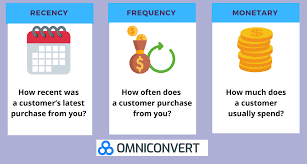

What is RFM analysis and why does a marketer need it?

RFM analysis allows you to segment customers by the frequency and value of purchases and identify those customers who spend the most money.

As a rule, only a small percentage of customers respond to general promotional offers. RFM is an excellent segmentation method for predicting customer responses, improving interactions, and increasing profits. RFM uses customer behavior data to determine how to work with each customer group.


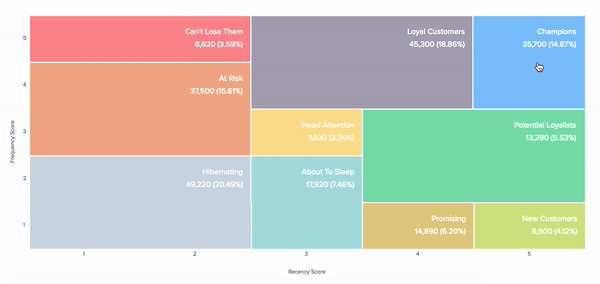

In [ ]:
# customer segmentation with rfm
# recency
# frequency
# monetary
# rfm analysis is a technique used for customer segmentation
# it enables customers to be divided into groups based on their purchasing habits and to develop strategies specific to these groups. 
# provides data-driven action

RFM stands for the three dimensions:

It groups customers based on their transaction history :

Recency — How many days ago was their last purchase?

Frequency — How many times has the customer purchased from our store?

Monetary Value — How much do they spend?

*Recency = the maximum of "10 – the number of months that have passed since the customer last purchased" and 1

*Frequency = the maximum of "the number of purchases by the customer in the last 12 months (with a limit of 10)" and 1

*Monetary = the highest value of all purchases by the customer expressed as a multiple of some benchmark value

## feature create from data 2010

In [ ]:

df_Frequence =pd.read_csv('/content/2010after_cleaningv2 ')#دخل كام مرة و اشتري و ماكنسلش طالبه

In [ ]:
#ِِAdjust today:
import datetime as dt
today =dt.datetime(2012,1,1)

#Bigger than zero and just UK , when order is cancel ,Quantity is calculated negative
df_Frequence=df_Frequence[df_Frequence["Quantity"]>0]
#df_Frequence=df_Frequence[df1["TotalPrice"]>0]
df_Frequence.shape

(349227, 10)

In [ ]:
df_Frequence.head()

In [ ]:
# Recency &Monetary &Frequency
df_Frequence=df_Frequence.groupby('CustomerID').agg({"InvoiceNo": lambda x :x.count() } ).rename(columns={"InvoiceNo":"Frequency(Time)" })
df_Frequence=pd.DataFrame(df_Frequence)
df_Frequence.head()

,Frequency(Time)
CustomerID,
12346,1
12747,103
12748,4413
12749,199
12820,59


In [ ]:
ind_F=pd.DataFrame(df_Frequence.index)
ind_F['Frequency(Time)']=df_Frequence.values
df_Frequence=ind_F
df_Frequence

,CustomerID,Frequency(Time)
0,12346,1
1,12747,103
2,12748,4413
3,12749,199
4,12820,59
...,...,...
3916,18280,10
3917,18281,7
3918,18282,12
3919,18283,721


In [ ]:
df_Recency=pd.read_csv('/content/2010before_canceling')
df_Recency['InvoiceDate']=pd.to_datetime(df_Recency['InvoiceDate'])#3

In [ ]:
#Bigger than zero and just UK , when order is cancel ,Quantity is calculated negative
df_Recency=df_Recency[df_Recency["Quantity"]>0]

In [ ]:
# Recency &Monetary &Frequency
df_Recency=df_Recency.groupby('CustomerID').agg({ "InvoiceDate": lambda x:(today - x.max()).days ,
               } ).rename(columns={'InvoiceDate':"Recency(Days)" })
df_Recency=pd.DataFrame(df_Recency)
df_Recency

,Recency(Days)
CustomerID,
12346,347
12747,24
12748,22
12749,25
12820,25
...,...
18280,299
18281,202
18282,29


In [ ]:
ind_R=pd.DataFrame(df_Recency.index)

ind_R['Recency(Days)']=df_Recency.values
df_Recency=ind_R
df_Recency

,CustomerID,Recency(Days)
0,12346,347
1,12747,24
2,12748,22
3,12749,25
4,12820,25
...,...,...
3916,18280,299
3917,18281,202
3918,18282,29
3919,18283,25


In [ ]:
id=pd.DataFrame()
M=pd.DataFrame()
F=pd.DataFrame()
R=pd.DataFrame()
i=0

for index in df_tranction_cluster['CustomerID']:
  if (index in df_Recency.values) and (index in df_Frequence.values):
    #print(f"true{i+1}")
    M=M.append(df_tranction_cluster[df_tranction_cluster['CustomerID']==index],ignore_index=True)
    F=F.append(df_Frequence[df_Frequence['CustomerID']==index],ignore_index=True)
    R=R.append(df_Recency[df_Recency['CustomerID']==index],ignore_index=True)
    #F['Frequency(Time)']=df_Frequence[df_Frequence['CustomerID']==index]['Frequency(Time)']
    #R['Recency(Days)']=df_Recency[df_Recency['CustomerID']==index]['Recency(Days)']


In [ ]:
T_RFM=M[['CustomerID','sum']]


In [ ]:
T_RFM['Recency(Days)']=R['Recency(Days)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
T_RFM['Frequency(Time)']=F['Frequency(Time)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
T_RFM=T_RFM.set_index("CustomerID")

In [ ]:
T_RFM=T_RFM.rename(columns={'sum':'Monetary($)'})

In [ ]:
T_RFM

,Monetary($),Recency(Days),Frequency(Time)
CustomerID,,,
12346,77183.60,347,1
12747,2769.40,24,103
12748,19401.20,22,4413
12749,2755.23,25,199
12820,388.23,25,59
...,...,...,...
18280,180.60,299,10
18281,80.82,202,7
18282,100.21,29,12


In [ ]:
# Recency &Monetary &Frequency
T_RFM=df1.groupby('CustomerID').agg({ "TotalPrice":  lambda x: x.sum() , "InvoiceDate": lambda x:(today - x.max()).days ,
               "InvoiceNo": lambda x :x.count() } ).rename(columns={'InvoiceDate':"Recency(Days)","TotalPrice":"Monetary($)","InvoiceNo":"Frequency(Time)" })
T_RFM=pd.DataFrame(T_RFM)
T_RFM.head()

,Monetary($),Recency(Days),Frequency(Time)
CustomerID,,,
12346,77183.60,347,1
12747,4196.01,24,103
12748,33053.19,22,4412
12749,4090.88,25,199
12820,942.34,25,59


In [ ]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349203 non-null  object        
 1   StockCode    349203 non-null  object        
 2   Description  349203 non-null  object        
 3   Quantity     349203 non-null  int64         
 4   InvoiceDate  349203 non-null  datetime64[ns]
 5   UnitPrice    349203 non-null  float64       
 6   CustomerID   349203 non-null  object        
 7   Country      349203 non-null  object        
 8   TotalPrice   349203 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 26.6+ MB


## feature create from data 2009

In [ ]:

df_Frequence =pd.read_csv('/content/2009after_cleaningv2 ')#دخل كام مرة و اشتري و ماكنسلش طالبه

In [ ]:
#ِِAdjust today:
import datetime as dt
today =dt.datetime(2012,1,1)

#Bigger than zero and just UK , when order is cancel ,Quantity is calculated negative
df_Frequence=df_Frequence[df_Frequence["Quantity"]>0]
#df_Frequence=df_Frequence[df1["TotalPrice"]>0]
df_Frequence.shape

(349227, 10)

In [ ]:
df_Frequence.head()

In [ ]:
# Recency &Monetary &Frequency
df_Frequence=df_Frequence.groupby('Customer ID').agg({"Invoice": lambda x :x.count() } ).rename(columns={"Invoice":"Frequency(Time)" })
df_Frequence=pd.DataFrame(df_Frequence)
df_Frequence.head()

,Frequency(Time)
CustomerID,
12346,1
12747,103
12748,4413
12749,199
12820,59


In [ ]:
ind_F=pd.DataFrame(df_Frequence.index)
ind_F['Frequency(Time)']=df_Frequence.values
df_Frequence=ind_F
df_Frequence

,CustomerID,Frequency(Time)
0,12346,1
1,12747,103
2,12748,4413
3,12749,199
4,12820,59
...,...,...
3916,18280,10
3917,18281,7
3918,18282,12
3919,18283,721


In [ ]:
df_Recency=pd.read_csv('/content/2010before_canceling')
df_Recency['InvoiceDate']=pd.to_datetime(df_Recency['InvoiceDate'])#3

In [ ]:
#Bigger than zero and just UK , when order is cancel ,Quantity is calculated negative
df_Recency=df_Recency[df_Recency["Quantity"]>0]

In [ ]:
# Recency &Monetary &Frequency
df_Recency=df_Recency.groupby('Customer ID').agg({ "InvoiceDate": lambda x:(today - x.max()).days ,
               } ).rename(columns={'InvoiceDate':"Recency(Days)" })
df_Recency=pd.DataFrame(df_Recency)
df_Recency

,Recency(Days)
CustomerID,
12346,347
12747,24
12748,22
12749,25
12820,25
...,...
18280,299
18281,202
18282,29


In [ ]:
ind_R=pd.DataFrame(df_Recency.index)

ind_R['Recency(Days)']=df_Recency.values
df_Recency=ind_R
df_Recency

,CustomerID,Recency(Days)
0,12346,347
1,12747,24
2,12748,22
3,12749,25
4,12820,25
...,...,...
3916,18280,299
3917,18281,202
3918,18282,29
3919,18283,25


In [ ]:
id=pd.DataFrame()
M=pd.DataFrame()
F=pd.DataFrame()
R=pd.DataFrame()
i=0

for index in df_tranction_cluster['Customer ID']:
  if (index in df_Recency.values) and (index in df_Frequence.values):
    #print(f"true{i+1}")
    M=M.append(df_tranction_cluster[df_tranction_cluster['Customer ID']==index],ignore_index=True)
    F=F.append(df_Frequence[df_Frequence['Customer ID']==index],ignore_index=True)
    R=R.append(df_Recency[df_Recency['Customer ID']==index],ignore_index=True)
    #F['Frequency(Time)']=df_Frequence[df_Frequence['Customer ID']==index]['Frequency(Time)']
    #R['Recency(Days)']=df_Recency[df_Recency['Customer ID']==index]['Recency(Days)']


In [ ]:
T_RFM=M[['Customer ID','sum']]


In [ ]:
T_RFM['Recency(Days)']=R['Recency(Days)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
T_RFM['Frequency(Time)']=F['Frequency(Time)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
T_RFM=T_RFM.set_index("Customer ID")

In [ ]:
T_RFM=T_RFM.rename(columns={'sum':'Monetary($)'})

In [ ]:
T_RFM

,Monetary($),Recency(Days),Frequency(Time)
CustomerID,,,
12346,77183.60,347,1
12747,2769.40,24,103
12748,19401.20,22,4413
12749,2755.23,25,199
12820,388.23,25,59
...,...,...,...
18280,180.60,299,10
18281,80.82,202,7
18282,100.21,29,12


In [ ]:
# Recency &Monetary &Frequency
T_RFM=df1.groupby('Customer ID').agg({ "TotalPrice":  lambda x: x.sum() , "InvoiceDate": lambda x:(today - x.max()).days ,
               "Invoice": lambda x :x.count() } ).rename(columns={'InvoiceDate':"Recency(Days)","TotalPrice":"Monetary($)","Invoice":"Frequency(Time)" })
T_RFM=pd.DataFrame(T_RFM)
T_RFM.head()

,Monetary($),Recency(Days),Frequency(Time)
CustomerID,,,
12346,77183.60,347,1
12747,4196.01,24,103
12748,33053.19,22,4412
12749,4090.88,25,199
12820,942.34,25,59


In [ ]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349203 non-null  object        
 1   StockCode    349203 non-null  object        
 2   Description  349203 non-null  object        
 3   Quantity     349203 non-null  int64         
 4   InvoiceDate  349203 non-null  datetime64[ns]
 5   UnitPrice    349203 non-null  float64       
 6   CustomerID   349203 non-null  object        
 7   Country      349203 non-null  object        
 8   TotalPrice   349203 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 26.6+ MB


# **Create RFM Score**

**segmen each follwe Recency , Frequency and Monetary for 5 rank**

rank 1>=20% values of columen


rank 2>=40% values of columen

rank 3>=60% values of columen

rank 4>=80% values of columen

rank 5>=100% values of columen

In [ ]:
T_RFM["Recency_score"]= pd.qcut(T_RFM["Recency(Days)"], 5, labels =[5,4,3,2,1])
T_RFM["Monetary_score"]=pd.qcut(T_RFM["Monetary($)"],5, labels =[5,4,3,2,1])
T_RFM["Frequency_score"]=pd.qcut(T_RFM["Frequency(Time)"],5 ,labels=[5,4,3,2,1])
T_RFM.head(1)
T_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3265 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Monetary($)      3265 non-null   float64 
 1   Recency(Days)    3265 non-null   int64   
 2   Frequency(Time)  3265 non-null   int64   
 3   Recency_score    3265 non-null   category
 4   Monetary_score   3265 non-null   category
 5   Frequency_score  3265 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 112.2 KB


**RFM Score**

Finally, we can rank these customers by combining their individual R, F, and M rankings to arrive at an aggregated RFM score. This RFM score, displayed in the table below, is simply **the average of the individual R, F, and M scores**, obtained by giving equal weights to each RFM attribute.

Recency_score    4338 non-null   category

 Monetary_score   4338 non-null   category
 
  Frequency_score  4338 non-null   category

  we need convert type to 

In [ ]:
#TypeError: Object with dtype category cannot perform the numpy op add
#when  T_RFM["rfm_score"]= () => T_RFM["Recency_score"].astype(str) + T_RFM["Monetary_score"].astype(str) 
T_RFM["rfm_score"]=(T_RFM["Recency_score"].astype(str) + T_RFM["Monetary_score"].astype(str) + T_RFM["Frequency_score"].astype(str))
T_RFM.head(1)



,Monetary($),Recency(Days),Frequency(Time),Recency_score,Monetary_score,Frequency_score,rfm_score
CustomerID,,,,,,,
12346,77183.6,347,1,1,1,5,115


**Recency and Frequency Grid**

A low recency and frequency score (bottom left) represents hibernating users who haven’t been active recently or frequently. A high recency and frequency score (top right) represents users who have been active recently and frequently, indicating your app’s champions.

Users are then ranked in order of percentile. For example, a user who has performed the activity most recently would constitute the 100th percentile. Users are then ranked by a score of 1 through 5, based on their percentile, with 5 being the highest.


The Recency and Frequency Grid breaks your user base down into:
Champions [R(4 – 5), F(4 – 5)] 55

Loyal Customers [R(3 – 4), F(4 – 5)]45

Potential Loyalists [R(4 – 5), F(2 – 3)]53

Promising [R(3 – 4), F(0 – 1)]41

Can’t Lose Them [R(1 – 2), F(4 – 5)]25

At Risk [R(1 – 2), F(3 – 4)]24

About to Sleep [R(2 – 3), F(1-2)]32

Hibernating [R(1 – 2), F(1 – 2)]22

New Customers R [(4 – 5), F(0 – 1)]51

Need Attention R [(2 – 3), F(2 – 3)]33

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

T_RFM['Segment'] = T_RFM['Recency_score'].astype(str) + T_RFM['Frequency_score'].astype(str)
T_RFM['Segment'] = T_RFM['Segment'].replace(seg_map, regex=True)


In [ ]:

T_RFM.head(2)

,Monetary($),Recency(Days),Frequency(Time),Recency_score,Monetary_score,Frequency_score,rfm_score,Segment
CustomerID,,,,,,,,
12346,77183.6,347,1,1,1,5,115,Can't Loose
12747,2769.4,24,103,5,1,2,512,Potential Loyalists


# Classification with tensorflow keras

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import RandomFourierFeatures#SVM
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, Dropout, AlphaDropout, BatchNormalization,Concatenate, concatenate
from tensorflow.keras.optimizers import SGD, RMSprop, Adamax, Adagrad, Adam, Nadam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import *

In [ ]:
selected_customers=pd.read_csv('/content/selected_customers_training', encoding= 'unicode_escape')#1
X_test=pd.read_csv('/content/X_Test', encoding= 'unicode_escape')#1
Y_test=np.load('Y_Test.npy')

In [ ]:
T_RFM.head(1)

,Monetary($),Recency(Days),Frequency(Time),Recency_score,Monetary_score,Frequency_score,rfm_score,Segment
CustomerID,,,,,,,,
12346,77183.6,347,1,1,1,5,115,Can't Loose


In [ ]:
T_RFM.to_csv('/content/T-RFM_training')

In [ ]:

json_customer=pd.read_csv('/content/json_customer (2)', encoding= 'unicode_escape')

In [ ]:
json_customer.to_csv('/content/json_customer')

In [ ]:
json_customer.head(1)

,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,...,FirstPurchase,Customer_pattern,Monetary,Recency,Frequency,Recency_score,Monetary_score,Frequency_score,rfm_score,Segment
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,1,77183.6,77183.6,77183.6,77183.6,0.0,0.0,100.0,0.0,0.0,...,255,3,77183.6,347,1,1,1,5,115,Can't Loose


In [ ]:
json_customer=json_customer.set_index('CustomerID')

In [ ]:
json_customer=T_RFM.append(json_customer)

In [ ]:
# concatenating more than 3 dataframes
# set "axis=1" for concatenation along columns
res = [json_customer, T_RFM]
json_customer=pd.concat(res, axis=1)


In [ ]:
json_customer.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
json_customer = json_customer.loc[:,~json_customer.columns.duplicated()]

In [ ]:
json_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        3265 non-null   int64  
 1   count             3265 non-null   int64  
 2   min               3265 non-null   float64
 3   max               3265 non-null   float64
 4   mean              3265 non-null   float64
 5   sum               3265 non-null   float64
 6   categ_0           3265 non-null   float64
 7   categ_1           3265 non-null   float64
 8   categ_2           3265 non-null   float64
 9   categ_3           3265 non-null   float64
 10  categ_4           3265 non-null   float64
 11  categ_5           3265 non-null   float64
 12  LastPurchase      3265 non-null   int64  
 13  FirstPurchase     3265 non-null   int64  
 14  Customer_pattern  3265 non-null   int64  
 15  Monetary          3265 non-null   float64
 16  Recency           3265 non-null   int64  


In [ ]:
import pandas as pd

T_RFM=pd.read_csv('/content/T-RFM_training', encoding= 'unicode_escape')

In [ ]:
T_RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3265 non-null   int64  
 1   CustomerID       3265 non-null   int64  
 2   Monetary         3265 non-null   float64
 3   Recency          3265 non-null   int64  
 4   Frequency        3265 non-null   int64  
 5   Recency_score    3265 non-null   int64  
 6   Monetary_score   3265 non-null   int64  
 7   Frequency_score  3265 non-null   int64  
 8   rfm_score        3265 non-null   int64  
 9   Segment          3265 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 255.2+ KB


In [ ]:
rfm_score=pd.DataFrame()
rfm_score['rfm_score']=T_RFM['rfm_score']

In [ ]:
rfm_score=rfm_score.reset_index(drop=True)

In [ ]:
rfm_score=rfm_score.drop_duplicates()

In [ ]:
rfm_score.shape

(118, 1)

In [ ]:
T_RFM['rfm_score'].shape

(3265,)

## DDN classifier

1.   List item
2.   List item



In [ ]:
#T_RFM['rfm_score']=pd.to_numeric(T_RFM['rfm_score'])#3

In [ ]:
T_RFM=T_RFM.rename(columns={'Monetary($)':'Monetary'   ,'Recency(Days)' : 'Recency' ,  'Frequency(Time)':'Frequency' })

In [ ]:
#select input & output
columns = ['Monetary', 'Recency', 'Frequency']
X_train = T_RFM[columns]
Y_train = T_RFM['rfm_score']

In [ ]:
def input_evaluation_set():
    features = {'Monetary($)': T_RFM['Monetary($)'].to_numpy(),
                'Recency(Days)':  T_RFM['Recency(Days)'].to_numpy(),
                'Frequency(Time)':  T_RFM['Frequency(Time)'].to_numpy(),
                                                                             }
    labels = rfm_score['rfm_score'].to_numpy()
    return features, labels

In [ ]:
def input_fn(features, labels, training=True, batch_size=256):#used in Train the Model
    """An input function for training or evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
        
    return dataset.batch(batch_size)

In [ ]:
#select input & output
columns = ['Monetary', 'Recency', 'Frequency']
X_train = T_RFM[columns]
Y_train = T_RFM['rfm_score']

In [ ]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in X_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

my_feature_columns

[NumericColumn(key='Monetary', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Recency', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Frequency', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [ ]:

# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier1 = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[128,64,32,118],#hidden_units=[128,64,32,10][30, 10]
    # The model must choose between 10 classes.
    n_classes=120)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0jawk4cc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
# Train the Model.
classifier1.train(
    input_fn=lambda: input_fn(X_train, Y_train, training=True),
    steps=400)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp0jawk4cc/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


InvalidArgumentError: ignored

In [ ]:
#Evaluate the trained model
eval_result = classifier1.evaluate(
    input_fn=lambda: input_fn(X_train, Y_train, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

In [ ]:
# Generate predictions from the model
# given test set 3 element and result the compare result y_true "expected" with predict" predictions"
expected = Y_test
predict_x = {
                 'Monetary($)': T_RFM['Monetary($)'].to_numpy(),#test
                'Recency(Days)':  T_RFM['Recency(Days)'].to_numpy(),
                'Frequency(Time)':  T_RFM['Frequency(Time)'].to_numpy(),
}

def input_fn(features, batch_size=256):
    """An input function for prediction."""
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

predictions = classifier1.predict(
    input_fn=lambda: input_fn(predict_x))

In [ ]:
import numpy as np
categ = ['0', '1', '2','3','4','5','6','7','8','9']
preds=np.array([])
i=1
#prints a few predictions and their probabilities:
for pred_dict, expec in zip(predictions, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]
    preds=np.append (preds, int(categ[class_id]))
    

    print('Prediction is "{}" ({:.1f}%), expected "{}"'.format(
        categ[class_id], 100 * probability, expec))

In [ ]:
print(expected)
print(preds)

# **Summary Statistics**

In [ ]:
rfmStats1 = T_RFM[["Segment","Recency(Days)","Frequency(Time)", "Monetary($)"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats1

Recency(Days)               ... Monetary($)                    
                             mean median count  ...      median count           std
Segment                                         ...                                
About to Sleep          71.153333   71.0   300  ...    1554.260   300   4872.675466
At Risk                212.119363  204.5   754  ...     405.735   754    626.622662
Can't Loose            235.813688  238.0   526  ...     178.610   526   4248.291902
Champions               28.120690   29.0   116  ...     350.220   116  15632.700827
Hibernating            173.680000  150.0   275  ...    1129.060   275   1294.969873
Loyal Customers         61.685437   60.0   515  ...     311.160   515    662.361915
Need Attention          73.534759   73.0   187  ...     668.430   187   1032.022905
New Customers           27.212938   26.0   371  ...    3564.830   371  19747.190651
Potential Loyalists     37.135821   37.0   670  ...    1039.030   670   3580.156361
Promising               43.820388   44.0   206  ...    2750.540   206   3618.513574

[10 rows x 12 columns]

In [ ]:
rfmStats1.columns = rfmStats1.columns.map('_'.join).str.strip('|')
rfmStats1

,Recency(Days)_mean,Recency(Days)_median,Recency(Days)_count,Recency(Days)_std,Frequency(Time)_mean,Frequency(Time)_median,Frequency(Time)_count,Frequency(Time)_std,Monetary($)_mean,Monetary($)_median,Monetary($)_count,Monetary($)_std
Segment,,,,,,,,,,,,
About to Sleep,71.153333,71.0,300,11.058819,136.330000,110.5,300,84.294720,2224.501300,1554.260,300,4872.675466
At Risk,212.119363,204.5,754,86.848078,28.972149,27.0,754,11.833417,563.368411,405.735,754,626.622662
Can't Loose,235.813688,238.0,526,90.923408,6.918251,7.0,526,3.719571,601.895190,178.610,526,4248.291902
Champions,28.120690,29.0,116,3.449399,15.327586,16.0,116,8.342428,2101.910862,350.220,116,15632.700827
Hibernating,173.680000,150.0,275,76.065901,106.574545,85.0,275,59.804097,1479.596258,1129.060,275,1294.969873
Loyal Customers,61.685437,60.0,515,17.281996,15.407767,15.0,515,8.118093,466.034951,311.160,515,662.361915
Need Attention,73.534759,73.0,187,11.436248,41.336898,40.0,187,8.114694,837.824652,668.430,187,1032.022905
New Customers,27.212938,26.0,371,3.751820,373.954178,236.0,371,579.414892,7964.638356,3564.830,371,19747.190651
Potential Loyalists,37.135821,37.0,670,9.476636,68.407463,65.5,670,25.504938,1714.461658,1039.030,670,3580.156361


In [ ]:
pd.DataFrame(T_RFM['Segment'].value_counts()).index

Index(['At Risk', 'Potential Loyalists', 'Can't Loose', 'Loyal Customers',
       'New Customers', 'About to Sleep', 'Hibernating', 'Promising',
       'Need Attention', 'Champions'],
      dtype='object')

In [ ]:

T_RFM.groupby(['Segment']).agg(sum_segment=('Monetary($)',np.sum))

,sum_segment
Segment,
About to Sleep,667350.390
At Risk,424779.782
Can't Loose,316596.870
Champions,243821.660
Hibernating,406888.971
Loyal Customers,240008.000
Need Attention,156673.210
New Customers,2954880.830
Potential Loyalists,1148689.311


In [ ]:
pd.DataFrame(T_RFM).groupby('Segment').sum()

,Monetary($),Recency(Days),Frequency(Time)
Segment,,,
About to Sleep,667350.390,21346,40899
At Risk,424779.782,159938,21845
Can't Loose,316596.870,124038,3639
Champions,243821.660,3262,1778
Hibernating,406888.971,47762,29308
Loyal Customers,240008.000,31768,7935
Need Attention,156673.210,13751,7730
New Customers,2954880.830,10096,138737
Potential Loyalists,1148689.311,24881,45833


In [ ]:
size_groubs =pd.DataFrame(T_RFM['Segment'].value_counts())
size_groubs


,Segment
At Risk,754
Potential Loyalists,670
Can't Loose,526
Loyal Customers,515
New Customers,371
About to Sleep,300
Hibernating,275
Promising,206
Need Attention,187
Champions,116


In [ ]:
size_groubs['Segment'].values


array([754, 670, 526, 515, 371, 300, 275, 206, 187, 116])

In [ ]:
Monetary_Segment =T_RFM.groupby(['Segment']).agg(sum_segment=('Monetary($)',np.sum))
Monetary_Segment

,sum_segment
Segment,
About to Sleep,667350.390
At Risk,424779.782
Can't Loose,316596.870
Champions,243821.660
Hibernating,406888.971
Loyal Customers,240008.000
Need Attention,156673.210
New Customers,2954880.830
Potential Loyalists,1148689.311


In [ ]:

Monetary_Segment.index


Index(['About to Sleep', 'At Risk', 'Can't Loose', 'Champions', 'Hibernating',
       'Loyal Customers', 'Need Attention', 'New Customers',
       'Potential Loyalists', 'Promising'],
      dtype='object', name='Segment')

In [ ]:
data1 = go.Bar(y = size_groubs.index,
              x = size_groubs['Segment'].values,
              name = str(size_groubs['Segment'].values),
            orientation='h' )
data2 = go.Bar(y = size_groubs.index ,
              x = Monetary_Segment['sum_segment'].values,
              name = str(Monetary_Segment['sum_segment'].values),
            orientation='h' )
layout = go.Layout(title={'text': "Number of Customer by Segments",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis =dict(title='Customers'),
                   
                   template = 'plotly_white'
                   )

fig=go.Figure(data= data1, layout=layout)
fig.update_xaxes(range=[0,800])
iplot(fig)

In [ ]:

data2 = go.Bar(y = size_groubs.index ,
              x = Monetary_Segment['sum_segment'].values,
              name = str(Monetary_Segment['sum_segment'].values),
            orientation='h' )
layout = go.Layout(title={'text': "Number of Customer by Segments",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis =dict(title='Customers'),
                   barmode='stack',
                   template = 'plotly_white'
                   )

fig=go.Figure(data= data2
                    , layout=layout)
fig.update_xaxes(range=[0,2954880])
iplot(fig)

#  find answers to some questions

**How to Implement RFM Analysis Used in Customer Segmentation**
RFM analysis helps marketers find answers to the following questions:

Who are your best customers?

Which of your customers could contribute to your churn rate?

Who has the potential to become valuable customers?

Which of your customers can be retained?

Which of your customers are most likely to respond to engagement campaigns?


**Who are your best customers?**

In [ ]:
T_RFM[T_RFM['rfm_score']=='555'].sort_values('Monetary($)', ascending=False).head()

,Monetary($),Recency(Days),Frequency(Time),Recency_score,Monetary_score,Frequency_score,rfm_score,Segment
CustomerID,,,,,,,,
18030,230.65,26,9,5,5,5,555,Champions
14569,227.39,23,12,5,5,5,555,Champions
13079,220.10,26,6,5,5,5,555,Champions
17436,216.30,23,9,5,5,5,555,Champions
14601,213.96,32,7,5,5,5,555,Champions


**Which customers are at the verge of churning?**


In [ ]:
#Customers who's recency value is low
T_RFM[T_RFM['Recency_score'] <= 2 ].sort_values('Monetary($)', ascending=False).head()

,Monetary($),Recency(Days),Frequency(Time),Recency_score,Monetary_score,Frequency_score,rfm_score,Segment
CustomerID,,,,,,,,
18102,259657.30,22,431,5,1,1,511,New Customers
17450,194390.79,30,336,5,1,1,511,New Customers
16446,168472.50,22,3,5,1,5,515,Champions
17511,91062.38,24,963,5,1,1,511,New Customers
16029,80850.84,60,241,3,1,1,311,About to Sleep


**Who are the lost customers?**


In [ ]:
T_RFM[T_RFM['rfm_score']=='115'].sort_values('Monetary($)',ascending=False).head()

,Monetary($),Recency(Days),Frequency(Time),Recency_score,Monetary_score,Frequency_score,rfm_score,Segment
CustomerID,,,,,,,,
12346,77183.6,347,1,1,1,5,115,Can't Loose
15749,44534.3,257,10,1,1,5,115,Can't Loose
15098,39916.5,204,3,1,1,5,115,Can't Loose
13135,3096.0,218,1,1,1,5,115,Can't Loose
16754,2002.4,394,2,1,1,5,115,Can't Loose


In [ ]:
#Customers who's recency, frequency as well as monetary values are low 
T_RFM[T_RFM['rfm_score']=='111'].sort_values('Recency(Days)',ascending=False).head()

,Monetary($),Recency(Days),Frequency(Time),Recency_score,Monetary_score,Frequency_score,rfm_score,Segment
CustomerID,,,,,,,,
17850,5391.210,394,297,1,1,1,111,Hibernating
15808,3651.270,328,195,1,1,1,111,Hibernating
13093,7832.470,297,159,1,1,1,111,Hibernating
13952,3251.071,239,137,1,1,1,111,Hibernating
15235,2247.510,239,143,1,1,1,111,Hibernating


**Who are the loyal customers?**

In [ ]:
#Customers with high frequency value
T_RFM[T_RFM['Frequency_score']>=3].sort_values('Monetary($)',ascending=False).head()

,Monetary($),Recency(Days),Frequency(Time),Recency_score,Monetary_score,Frequency_score,rfm_score,Segment
CustomerID,,,,,,,,
18102,259657.30,22,431,5,1,1,511,New Customers
17450,194390.79,30,336,5,1,1,511,New Customers
17511,91062.38,24,963,5,1,1,511,New Customers
16029,80850.84,60,241,3,1,1,311,About to Sleep
16684,66653.56,26,277,5,1,1,511,New Customers


# Customer category

## ***K-Means Segmentation***

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(10,5));
plt.subplot(1,3,1);
sns.distplot(T_RFM['Recency(Days)'],fit=norm);
plt.subplot(1,3,2);
sns.distplot(T_RFM['Frequency(Time)'],fit=norm);
plt.subplot(1,3,3);
sns.distplot(T_RFM['Monetary($)'],fit=norm);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

***Rescale Data***


When your data is comprised of attributes with varying scales, many machine learning algorithms
can benefit from rescaling the attributes to all have the same scale. Often this is referred to
as normalization and attributes are often rescaled into the range between 0 and 1. This is
useful for optimization algorithms used in the core of machine learning algorithms like gradient
descent. It is also useful for algorithms that weight inputs like regression and neural networks
and algorithms that use distance measures like k-Nearest Neighbors. You can rescale your data
using scikit-learn using the MinMaxScaler class2
.

In [ ]:
scaler_rfm=T_RFM[['Recency(Days)','Frequency(Time)','Monetary($)']].copy()

min_max_scaler=MinMaxScaler()
newscaler=min_max_scaler.fit_transform(scaler_rfm)
new_scaler_rfm=pd.DataFrame(newscaler)

new_scaler_rfm.head()


,0,1,2
0,0.871314,0.000000,0.297242
1,0.005362,0.013290,0.016146
2,0.000000,0.574723,0.127283
3,0.008043,0.025798,0.015741
4,0.008043,0.007557,0.003615


***Elbow Method***

In [ ]:
y_inertia=[]
k = [1,2,3,4,5,6,7,8,9]
for i in k:
  Kmeans=KMeans(n_clusters=i ,init="k-means++", random_state=0)
  Kmeans.fit(new_scaler_rfm)
  y_inertia.append(Kmeans.inertia_)


data = go.Scatter(x=k, y=y_inertia ,mode='lines+markers',marker=dict(size=10))

layout = go.Layout(title={'text': "Elbow Method",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   width=650,
                   height=470,
                   xaxis = dict(title='Number of Clusters'),
                   yaxis =dict(title='Sum of Squared Distance'),
                   template = 'plotly_white')

fig =go.Figure(data=data,layout=layout)
iplot(fig)

***Silhouette Score***

In [ ]:
kmeans = KMeans(n_clusters = 3,random_state = 42)
kmeans.fit(new_scaler_rfm)
print('Silhouette Score: {}'.format(round(metrics.silhouette_score(new_scaler_rfm, kmeans.labels_),3)))

Silhouette Score: 0.655


***Segment Analysis***

No special result

In [ ]:
T_RFM['k_means_segment'] = kmeans.labels_
T_RFM['k_means_segment'] = T_RFM['k_means_segment'].astype(str)
T_RFM[['Recency(Days)','Monetary($)','Frequency(Time)','k_means_segment']].groupby('k_means_segment').agg({'mean','std','max','min'})

Recency(Days)                   ... Frequency(Time)                        
                          min  max        mean  ...             max        mean         std
k_means_segment                                 ...                                        
0                         115  244  176.588398  ...             521   40.002762   47.212008
1                         247  395  315.175627  ...             297   23.234767   27.496507
2                          22  115   53.885898  ...            7676  116.480667  254.914622

[3 rows x 12 columns]

# Customer json

In [ ]:
df_tranction_orginal=pd.read_csv('/content/transactions_per_user_traning3265')
df_tranction_cluster=pd.read_csv('/content/selected_customers_training')

In [ ]:
df_tranction_orginal.shape

(3265, 15)

In [ ]:
customer_json.head(1)

,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5,LastPurchase,FirstPurchase,Customer_pattern
CustomerID,,,,,,,,,,,,,,
12346,1,77183.6,77183.6,77183.6,77183.6,0.0,0.0,100.0,0.0,0.0,0.0,255,255,3


In [ ]:
df_tranction_cluster=df_tranction_cluster.rename(columns={'cluster':'Customer_pattern'})


In [ ]:
customer_json=df_tranction_cluster.set_index('CustomerID')

In [ ]:
customer_json

In [ ]:
customer_json.to_csv('/content/json_customer')

In [ ]:
customer_json

,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5,LastPurchase,FirstPurchase,cluster
CustomerID,,,,,,,,,,,,,,
12346,1,77183.60,77183.60,77183.600000,77183.60,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,255,255,3
12747,8,301.70,442.96,346.175000,2769.40,3.489926,1.473243,17.281722,22.806384,2.036542,52.912183,39,299,4
12748,139,0.95,1948.35,139.576978,19401.20,13.699668,18.078779,24.722028,19.052945,6.664330,17.490516,0,303,5
12749,3,29.70,1866.43,918.410000,2755.23,18.934898,5.219891,23.759178,13.807922,15.672013,22.606098,60,143,2
12820,2,170.46,217.77,194.115000,388.23,16.652500,30.291322,15.403240,37.652938,0.000000,0.000000,4,256,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,1,180.60,180.60,180.600000,180.60,34.634551,0.000000,0.000000,31.339978,0.000000,34.025471,207,207,1
18281,1,80.82,80.82,80.820000,80.82,0.000000,18.708241,20.415739,18.930958,41.945063,0.000000,110,110,7
18282,1,100.21,100.21,100.210000,100.21,13.471709,20.516914,22.901906,17.662908,25.446562,0.000000,56,56,2
